In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# Importando os dados. 

Para importar os dados de um csv comum, usamos a função: 

[pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) - Essa função recebe como primeiro argumento o caminho para o arquivo csv que desejamos abrir. Na documentação há mais informações sobre o método, como: 

1) Indicar qual é o separador dos dados dentro do arquivo. (Geralmente é uma vírgula (,) mas caso seja outro, você pode indicar.

2) _Skiprows_  que permite pular N linhas do inicio do arquivo. E diversos outros parâmetros para importar os dados que você precisar

In [2]:
dados = pd.read_csv('heart.csv')
# dataframe.head(N) -> N indica o número de linhas que devem ser mostradas
dados.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Vamos ver o que significam as colunas do dataset. 

**Tradução livre**

* **age** Idade em anos / age in years
* **sex** (1 = Homem; 0 = Mulher) / (1 = male; 0 = female)
* **cpchest** Tipo de Dor / pain type
* **trestbps** Pressão arterial em descanso em mm Hg / resting blood pressure (in mm Hg on admission to the hospital)
* **chol** Colesterol Sérico em mg/dl / serum cholestoral in mg/dl
* **fbs** Nível de Açucar no sangue em jejum (Medido em mg/dl. Se a medida for maior que 120, essa coluna assuma o valor 1. Caso menor, assume o valor 0) / (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **restecg** Resultado do Eletrocardiograma em repouso / resting electrocardiographic results
* **thalach**  Batimentos cardíacos máximo / maximum heart rate achieved
* **exang** Exercício produz dor no peito? (Sim = 1, não = 0) / exercise induced angina (1 = yes; 0 = no)
* **oldpeak**  https://en.wikipedia.org/wiki/ST_depression / ST depression induced by exercise relative to rest
* **slope** https://en.wikipedia.org/wiki/ST_segment / the slope of the peak exercise ST segment
* **ca**  Número de vasos sanguíneos coloridos por fluoroscopia / number of major vessels (0-3) colored by fluoroscopy
* **thal**  Categoria (3 = Normal; 6 = Defeito Consertado; 7 = Defeito reversível)  /  3 = normal; 6 = fixed defect; 7 = reversable defect
* **target** Tem doença? (Sim = 1, Não = 0) / 1 or 0 <- Variável alvo do dataset

# Visualização de Dados

Parte do processo do estudos dos dados é a interação com os dados e com o contexto que ele se encaixa. É popular que a idade é um fator significativo para doenças cardíacas, então seria prudente explorar os dados com relação à idade


## Distribuição da população do dataset

Essa distribuição representa homens e mulheres

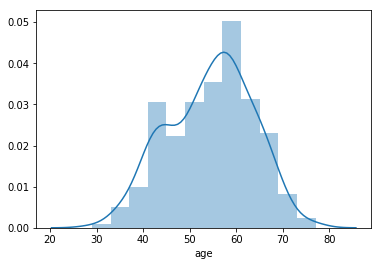

In [3]:
sns.distplot(dados['age'])

## Distribuição dos Homens


## Documentação
[sns.distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=dist#seaborn.distplot)

[Exemplos do sns.distplot](https://seaborn.pydata.org/examples/distplot_options.html)

**Possíveis mensagens de erro e como contorná-las**

[Truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()](https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o)

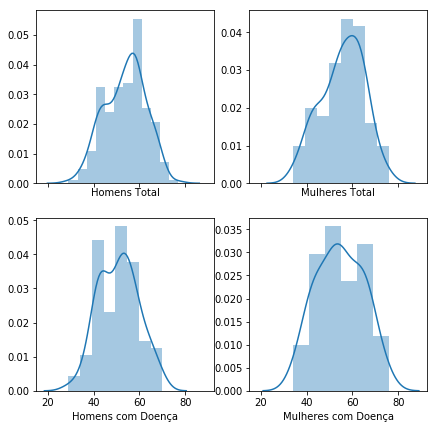

In [4]:
f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.distplot(dados[dados['sex'] == 1]['age'], axlabel="Homens Total", ax=axes[0,0]) # Homens
sns.distplot(dados[dados['sex'] == 0]['age'], axlabel="Mulheres Total", ax=axes[0,1]) # Mulheres

# Homens e mulheres que possuem Doença Cardíaca
# dados[dados['sex'] == 1] <- Isso pode ser lido como: "dados onde dados na coluna 'sex' seja igual a 1."
# Adicionalmente, onde está essa condição, podem existir outras condições. 

homens_com_doenca_cardiaca = dados[(dados['sex'] == 1) & (dados['target'] == 1)]['age']
mulheres_com_doenca_cardiaca = dados[(dados['sex'] == 0) & (dados['target'] == 1)]['age']

sns.distplot(homens_com_doenca_cardiaca, axlabel="Homens com Doença", ax=axes[1,0]) 
sns.distplot(mulheres_com_doenca_cardiaca, axlabel="Mulheres com Doença", ax=axes[1,1]) 


##  Visualização da relação entre Idade, colesterol e a Variavel alvo

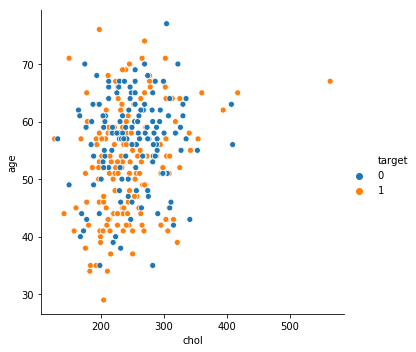

In [5]:
sns.relplot(x='chol',y='age',hue='target', data=dados)

## Quantidade de pessoas que  têm dores no peito ao fazer exercício


[Como mudar os labels dos eixos no seaborn](https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot)

[Como mudar os labels da legenda no seaborn](https://stackoverflow.com/questions/39606921/changing-pointplot-legend-in-seaborn) **Atenção** - Mudar as legendas pode ser um trabalho chatinho

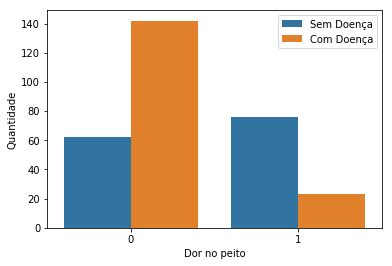

In [6]:
ax = sns.countplot('exang', hue='target', data=dados)
ax.set(xlabel='Dor no peito', ylabel='Quantidade')
legend_labels = ax.get_legend_handles_labels()[0]
ax.legend(legend_labels, ['Sem Doença', 'Com Doença'])

## Tentando identificar alguma relação com aumento da pressão arterial, idade e doenças cardíacas

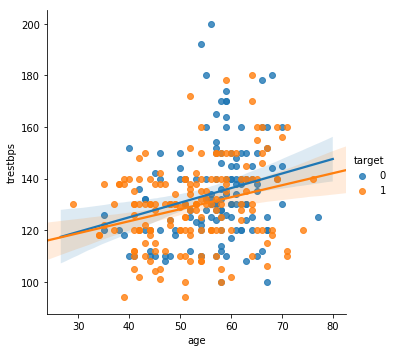

In [19]:
sns.lmplot('age', 'trestbps', hue='target', data=dados)

## Relação entre os tipos de dores no peito e Doença Cardíaca

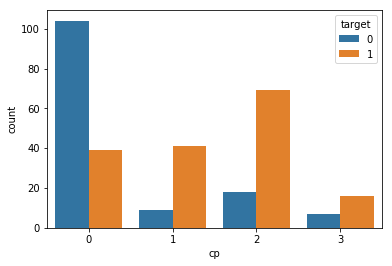

In [23]:
sns.countplot('cp', hue='target', data=dados)

## Batimentos Cardíacos Máximos x Idade e Pressão Sanguínea

o Gráfico abaixo relaciona os batimentos cardíacos máximos com a idade de cada pessoa. Adicionalmente, o tamanho dos pontos, relacionam a pressão arterial da pessoa. 


não parece existir uma separação clara entre doentes e não doentes somente com essas três innformações.

[Text(0, 0.5, 'Batimentos Máx'), Text(0.5, 0, 'Idade')]

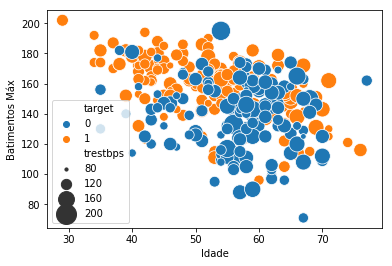

In [37]:
ax = sns.scatterplot('age','thalach', hue='target',size='trestbps',sizes=(10,400) ,data=dados)
ax.set(xlabel='Idade', ylabel='Batimentos Máx')

## Seria o oldpeak um indicador de doença no coração? 

ver: 

[St Depression](https://en.wikipedia.org/wiki/ST_depression)

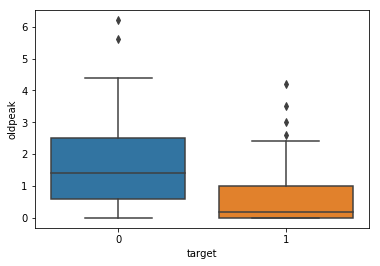

In [61]:
sns.boxplot('target', 'oldpeak',data=dados)

## Vamos ver esse mesmo plot com o Slope

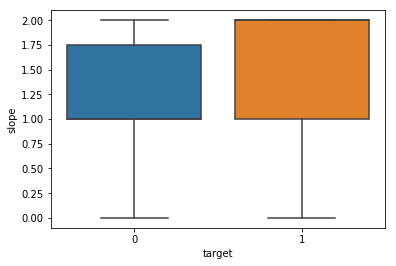

In [62]:
sns.boxplot('target', 'slope',data=dados)

## Por fim, vamos ver a distribuição de pessoas com doença


Há mais pacientes doentes que não doentes no dataset

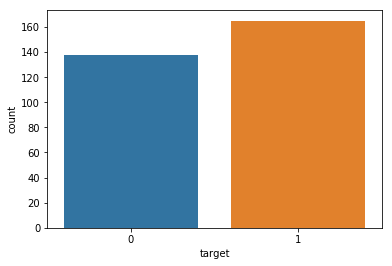

In [68]:
sns.countplot('target',data=dados)

# Tratamento de dados

In [65]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


[pd.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) é um método interessante para visualizar mais facilmente se há [outliers](https://pt.wikipedia.org/wiki/Outlier) no dataset

In [67]:
dados.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Ao utilizar a expressão: dados[column].isna().sum() contamos quantas ocorrencias de nulo existem nas colunas!

In [64]:
for column in dados.columns:
    print(dados[column].isna().sum(), column)

0 age
0 sex
0 cp
0 trestbps
0 chol
0 fbs
0 restecg
0 thalach
0 exang
0 oldpeak
0 slope
0 ca
0 thal
0 target


### Nenhuma coluna parece conter dados absurdos e nem dados faltantes. Passemos ao Machine Learning

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Pipeline


O uso de pipeline é algo muito interessante. Com o pipeline, podemos encadear os algoritmos como Normalização, Feature Selection, e o classificador. É bom pq realiza o encapsulamento da lógica do Modelo e você pode mexer no seu modelo com mais facilidade


### Documentação - Machine Learning


1) [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

2) [Train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

3) [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

4) [SVC - Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

5) [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

6) [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [75]:
X = dados.drop('target', axis=1)
y = dados['target']

X_treino, X_teste, y_treino, y_teste =  train_test_split(X,y)

In [77]:
pipeline = Pipeline([
    ('normalizer', Normalizer()),
    ('svc', SVC())
])

pipeline.fit(X_treino, y_treino)
predicted = pipeline.predict(X_teste)
print(classification_report(y_teste, predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        32
          1       0.58      1.00      0.73        44

avg / total       0.34      0.58      0.42        76



/home/gustavo/Envs/machine/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Essas métricas indicam Underfitting do classificador. Ou seja, o classificador não foi capaz de generalizar o suficiente com os dados que foram utilizados

In [78]:
print("Score para Treino: ",pipeline.score(X_treino, y_treino))
print("Score para Teste: ", pipeline.score(X_teste, y_teste))

Score para Treino:  0.5330396475770925
Score para Teste:  0.5789473684210527
